# Problema

- Um exercício sobre o problema de uma empresa de cartão de crédito, com um dataset de dados demográficos e financeiros dos últimos 6 meses (amostra de 30.000 linhas). Cada conta é uma linha).

- As linhas são rotuladas de acordo com como se no mês seguinte ao período de dados histórico de seis meses um proprietário da conta ficou inadimplente no próximo mês.

-> **Arquivo original: http://archive.ics.edu/ml**

## Objetivo

Prever se uma conta ficará inadimplente no próximo mês, de acordo com os dados demográficos e históricos.

### Iniciando a Exploração

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
%matplotlib inline

In [2]:
df = pd.read_excel('E:/ProjetosGitHub/1.CartaodeCredito/cartaoAnalise/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [3]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
#Valores Exclusivos
df['ID'].nunique()

29687

In [6]:
#Linhas totais
df.shape

(30000, 25)

In [7]:
#Indicativo de registros duplicados
id_counts = df['ID'].value_counts()
id_counts.head()

ID
ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: count, dtype: int64

In [8]:
#Exibindo numero de entradas Duplicadas
id_counts.value_counts()

count
1    29374
2      313
Name: count, dtype: int64

In [9]:
#vamos travar a aleatoriedade, para reproduzir os resultados
np.random.seed(seed=24)

### Teste para Identificação de Duplicados

In [10]:
#Geraremos 100 inteiros aleatórios  selecionados entre 1 e 5
random_integers = np.random.randint(low=1,high=5,size=100) 

In [11]:
random_integers[:5]

array([3, 4, 1, 4, 2])

In [12]:
#se quisessemos conhecer os locais de todos os elementos igual a 3 teríamos:
is_equal_to_3 = random_integers ==3
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [13]:
#se quisessemos saber quantos elementos igual a 3:
sum(is_equal_to_3)

22

In [14]:
#faz sentido pq a aleatoriedade fica proxima a 20% das vezes

In [15]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

### Retomando a Exploração

In [16]:
#Atribuiremos os IDS duplicados a uma variável chamada dupe_mask
dupe_mask = id_counts == 2
dupe_mask[0:5]

ID
ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: count, dtype: bool

In [17]:
id_counts.index[0:5]

Index(['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8', '7c9b7473-cc2f',
       '90330d02-82d9'],
      dtype='object', name='ID')

In [18]:
#Vamos armazenar os ID Duplicados em uma nova variável
dupe_ids = id_counts.index[dupe_mask]

In [19]:
#convertendo em lista
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [20]:
dupe_ids[0:5]

['ad23fe5c-7b09',
 '1fb3e3e6-a68d',
 '89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9']

In [21]:
dupe_ids[0:3]

['ad23fe5c-7b09', '1fb3e3e6-a68d', '89f8f447-fca8']

In [22]:
#Cada ID Duplicado parece ter uma linha de dados válidos e outra com zeros 
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Examinando os Dados e IDs Duplicados

In [23]:
#Uma abordagem para esse problema é seria encontrar as linhas que só tem zeros.
#Podemos encontrar as entradas do data frame que são iguais a zero criando uma matriz boleana.
df_zero_mask = df == 0

In [24]:
#vamos indexar  df_zero_mask usando(.iloc)
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

In [25]:
#Somando a série Boleana
sum(feature_zero_mask)

315

In [26]:
#Vamos limpar o DataFrame eliminando as linhas só com zeros, exceto pelo id
#Vamos salvar em um novo dataframe
#~ usamos o tio para a instrução not null - todas as linhas que não tenham zeros.
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [27]:
df_clean_1.shape

(29685, 25)

In [28]:
#Vamos consultar novamente os dados únicos:
df_clean_1['ID'].nunique()

29685

In [29]:
#Eliminamos com sucesso as duplicadas

### Explorando e Limpando os dados

Como foi identificado o problema na qualidade dos dados relacionado aos dados. Onde recebemos a informação de que cada amostra de nosso dataset corresponderia a um ID de conta exclusiva, o que não ocorreu. Com a indexação lógica usamos o Pandas para resolver o problema. 
Vamos examinar agora os valores das caracteristicas e da resposta, os dados que usaremos para desenvolver nosso modelo preditivo.

In [30]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


In [31]:
#A maioria das colunas exibe int64, indicando que tem o tipo de dado interger e é esperado, com a informação de dados, que seja um inteiro.
# No entanto temos um valor "0" não específicado na escala de informações  
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

**Os dados mostrados na coluna 'PAY_1' são o status de pagamento da fatura mensal mais recente. Os valores "0" não estão 
documentados no dicionario de dados.*

#### Escalas
- -1 = pagamento pontual;
-  1 = atraso de 1 mês no pagamento;
-  2 = atraso de 2 meses no pagamento;
-  8 = atraso de o meses no pagamento;


In [32]:
# aqui observamos que há  a presença de 2 valores não documentados 0 e -2.
# Há uma string "Not available" presente na coluna simbolizando dados ausentes.
df_clean_1['PAY_1'].value_counts()


PAY_1
0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: count, dtype: int64

In [33]:
#Vamos encontrar todas as linhas que não tem valor ausente para as características de PAY_1
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [34]:
#Vamos verificar quantas linhas não tem dados ausentes, calculando a soma das mascaras:
#26.664 linhas não tem valor 'Not available'
sum(valid_pay_1_mask)

26664

In [35]:
#Vamos selecionar as informações sem os dados ausentes das linhas PAY_1
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()
df_clean_2.shape

(26664, 25)

In [36]:
#Confirmando que os valores indesejados foram retirados ('Not Available')
df_clean_2['PAY_1'].value_counts()

PAY_1
0     13087
-1     5047
1      3261
-2     2476
2      2378
3       292
4        63
5        23
8        17
6        11
7         9
Name: count, dtype: int64

In [37]:
#Chegou a hora de converter o tipo de 'object' para 'int64'
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB



**Obs: Criamos um banco de dados limpo , mas não podemos esquecer que os valores não documentados -2 e 0 em PAY_1 continuam.**

Supondo que entramos em contato novamente com os sócios da empresa e nos fosse dada a seguinte informação:
- -2 significa que a conta começou o mês sem valor a ser pago e o crédito não foi usado.
- -1 significa que a conta usou um valor que foi totalmente pago.
- 0 significa que o pagamento mínimo foi feito, mas o saldo total devedor não foi pago (isto é, uma parcela do saldo devedor foi transportado para o próximo mês)  

### Exploração e garantia da qualidade dos dados 

Até aqui foram resolvidos dois problemas de qualidade de dados com as perguntas básicas e examinando o resumo de info(). Vamos examinar agora as primeiras colunas. Antes de chegarmos ao pagamento histórico de pagamento de faturas, temos os limites de crédito das contas em LIMIT_BAL, e as caracteristicas demográficas EDUCATION, MARRIEAGE e AGE.
- Limite de crédito e caracteristicas estárias;
- Caracteristicas categóricas de instrução e estado civil para ver se os valores fazem sentido;

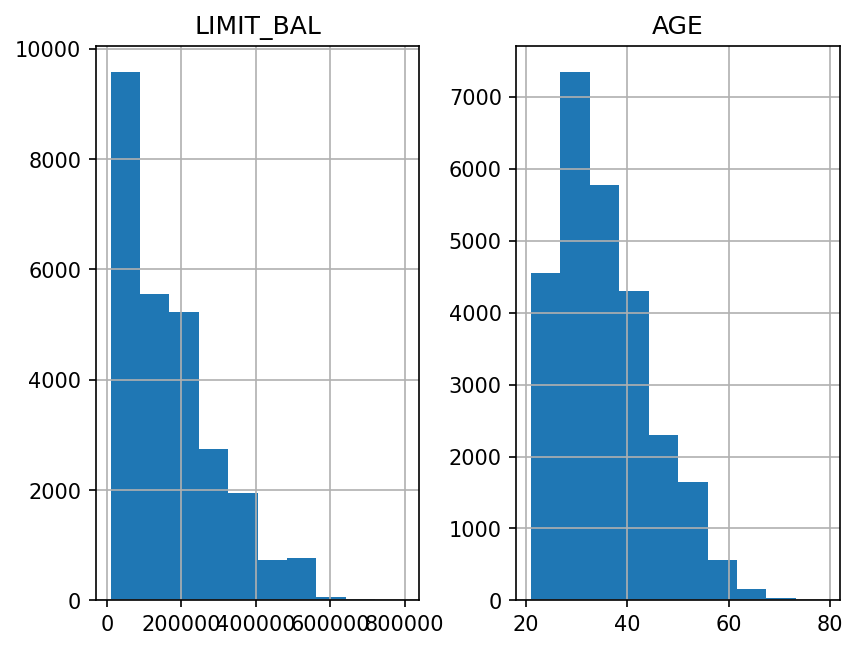

In [38]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()
plt.show()

In [39]:
#Analisando a síntese estatíticas de dados e limite de crédito e idade. (inclui a contagem de não nulos)
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [40]:
#Contagem das caracteristicas de 'EDUCATION' para encontrarmos o nivel de escolaridade.
#Aqui verificamos graus de instrução não documentados: 0, 5 e 6.
#Os documentados são: (1=Pós-Graduação; 2=Universidade; 3=Ensino Médio; 4=Outros)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: count, dtype: int64

In [41]:
#Vamos agrupar o não documentados na categoria "Outros", já que os valores dos não documentados não são relevantes.
df_clean_2['EDUCATION'] = df_clean_2['EDUCATION'].replace(to_replace=[0, 5 , 6], value=4)
df_clean_2['EDUCATION'].value_counts()

EDUCATION
2    12458
1     9412
3     4380
4      414
Name: count, dtype: int64

In [42]:
#Contagem das caracteristicas de 'Married'
#Catálogo: MARRIAGE - (1=casado; 2=Solteiro; 3=Outros)
#Há um mesmo problema, um valor "0", que não está documentadono dicionário de dados.
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      286
0       48
Name: count, dtype: int64

In [43]:
#Vamos colocar o valor "0" em outros, conforme fizemos em "Education".
df_clean_2['MARRIAGE'] = df_clean_2['MARRIAGE'].replace(to_replace=0, value=3)
df_clean_2['MARRIAGE'].value_counts()

MARRIAGE
2    14158
1    12172
3      334
Name: count, dtype: int64

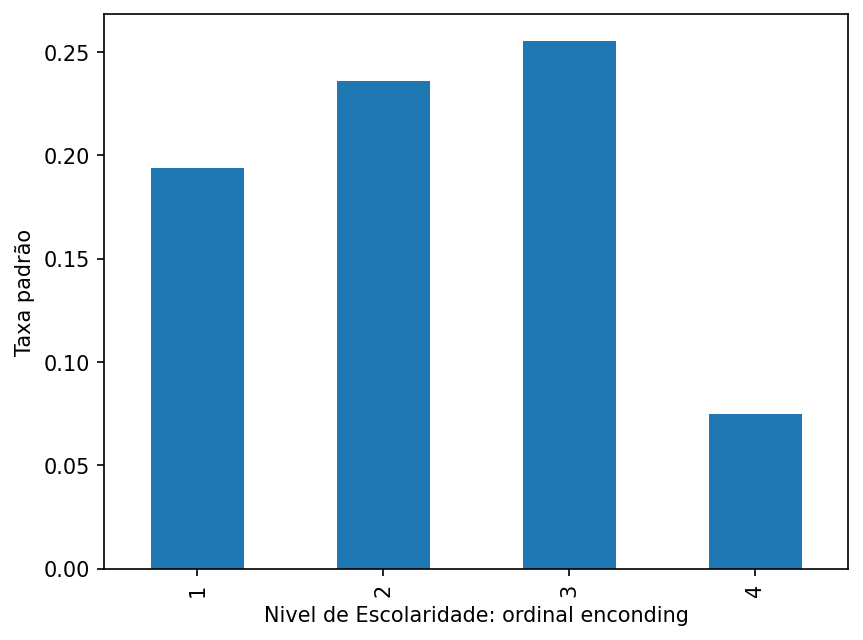

In [44]:
#Examinar os diferentes níveis de uma caracteristica categórica em relação aos valores médios.
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Taxa padrão')
plt.xlabel('Nivel de Escolaridade: ordinal enconding')
plt.show()

Obs: Observando a distribuição desses dados, talvez pensar em um ajuste de linha reta não seria a melhor opção. Vamos testar um algoritmo mais complexo como uma arvore de decisão ou floresta aleatória. 

### Codificação one-hot
A OHE é uma maneira de transformar  uma caracteristica categórica em uma numérica, para tornar possivel ser usada em modelos matemáticos.


In [45]:
#Antes da Coluna "EDUCATION" ser codificada
df_clean_2['EDUCATION_CAT'] = 'none'

In [46]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [47]:
#Vamos mapear as informações de educação
cat_mapping = {
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}

In [48]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION','EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [49]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT']).astype(int)

In [50]:
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [51]:
#Vamos examinar os bancos de dados lado a lado, então vamos concatenar.
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)

In [52]:
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [53]:
#Agora é um bom momento pata gravar os dados concatenados
df_with_ohe.to_csv('../cartaoAnalise/cleaned_data.csv')

In [54]:
#Incluindo o CSV na variável df
df = pd.read_csv('../cartaoAnalise/cleaned_data.csv')

### As caracteristicas que faltam ser examinadas são a de histórico financeiro.

- Status de pagamento mensais nos últimos seis meses;
- As quantias cobradas e pagas no mesmo período.
 

In [55]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'] 

In [56]:
#Observando do describe() Parece que o valor 9, de nove meses ou mais de atraso, não aparece.
df[pay_feats].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [57]:
#Vamos examinar, novamente, a contagem  de valores do status de pagamentos do mês anterior. Em PAY_1.
df[pay_feats[0]].value_counts().sort_index()

PAY_1
-2     2476
-1     5047
 0    13087
 1     3261
 2     2378
 3      292
 4       63
 5       23
 6       11
 7        9
 8       17
Name: count, dtype: int64

**Em comparação aos numeros inteiros positivos, a maioria dos números são -2, -1 ou zero, que correspondem a contas que estavam em boa situação no mês passado.**

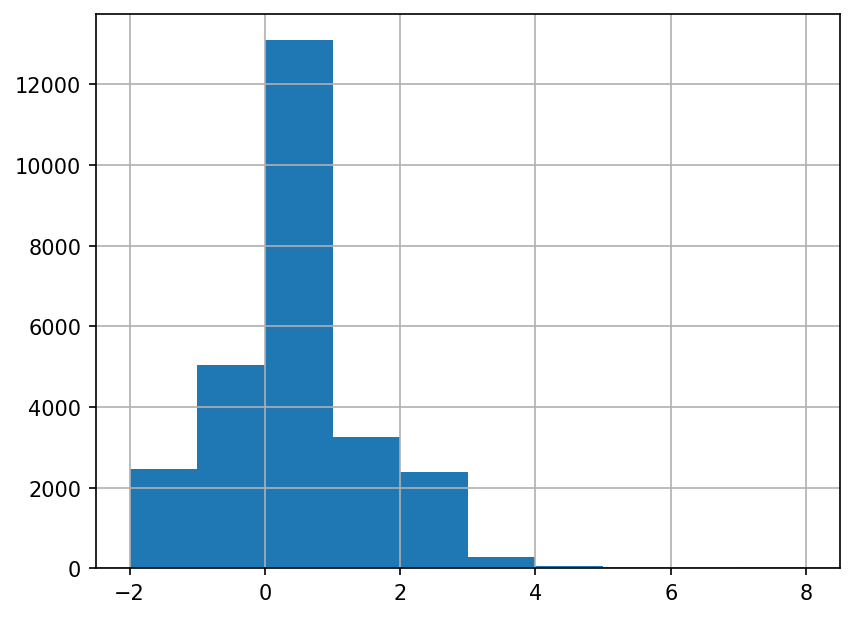

In [58]:
df[pay_feats[0]].hist()
plt.show()

- Vamos adequar o numero de bins com os valores os 11 valores exclusivos de PAY_1.

In [59]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

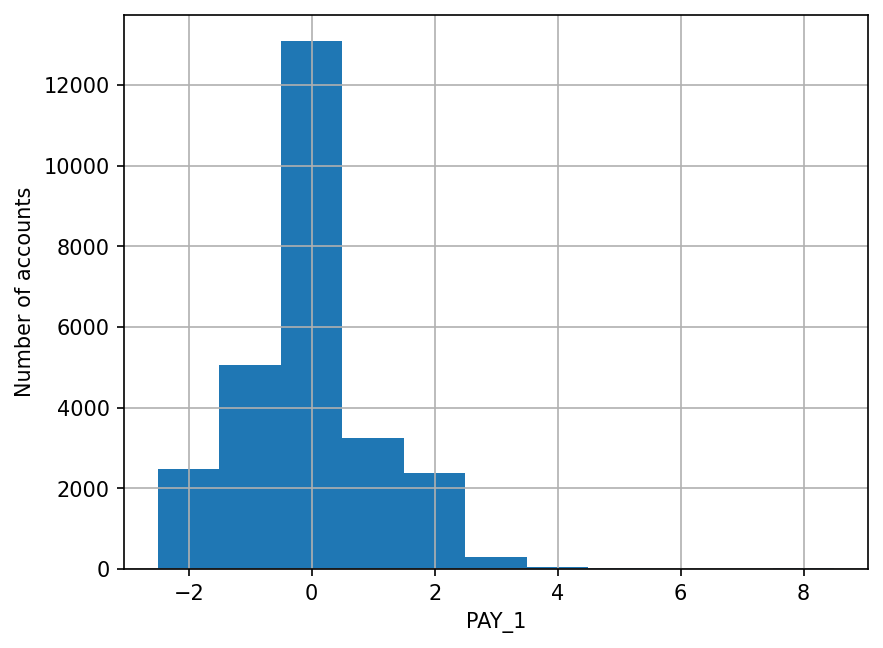

In [60]:
#vamos plotar
df[pay_feats[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of accounts')
plt.show()

**Podemos observar**:  que a maioria das contas está em boa situação: valores entre -2, -1, 0 são maioria. Observando essa caracteristica, parece razoavel que a maior parte pague suas contas em dia.

**Próximo passo**: vamos observar a plotagem em conjunto das caracteristicas de status de pagamento para cada um dos ultimos 6 meses.

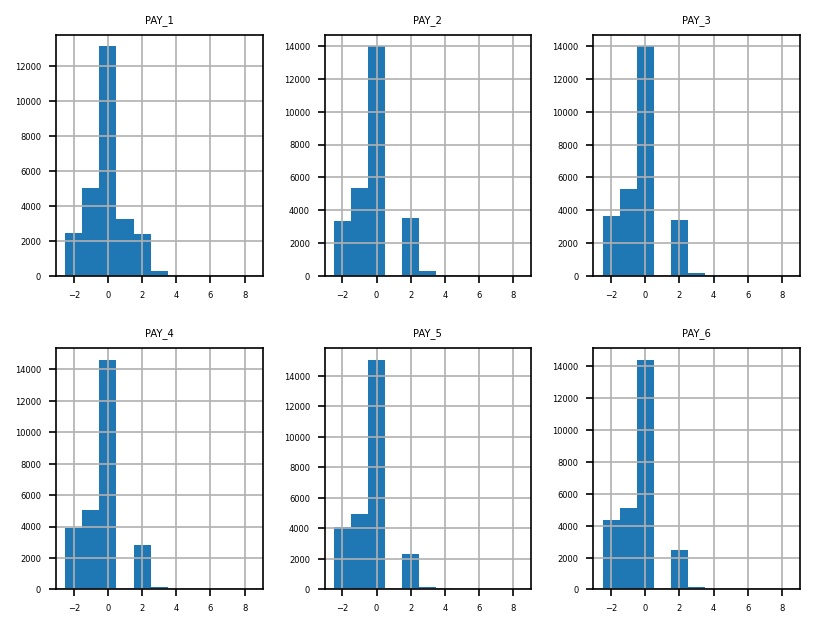

In [61]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))
plt.show()

**Quando colocamos lado a lado, podemos observar algo que não parece certo**. Exemplo:  PAY_2 é o status de reembolso de agosto, PAY_3 é o Status reembolso de julho. Um valor igual a 1 significa atraso de 1 mês no pagamento, enquando o valor 2 siginifica atraso de 2 meses no pagamento e assim por diante. Considerando os valores de PAY_3 e PAY_2, poucas contas tiveram atraso de 1 mês no pagamento (já que a barra não pode ser vista no histograma). No entanto, em agosto repentinamente há milhares de contas em atraso de 2 meses no pagamento. Há algo errado, o numero de contas com atraso de 2 meses em um mês específico deveria ser menor ou igual ao numero de contas com atraso de um mês no mês anterior.Precisaremos observar com mais detalhes as contas com atraso de 2 meses em agosto e veremos qual foi o status de pagamento em julho.

In [62]:
#Status de pagamento em julho (PAY_3) de contas com atraso de 2 meses no pagamento em agosto (PAY_2)
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
47,2,2


Observamos que as contas em atraso de 2 meses de agosto tem valores absurdos para o status de pagamento de julho. A unica maneira de chegarmos a um atraso de 2 meses seria haver um atraso de um mês no mês anterior, mas nenhuma dessas contas indica isso.

**Observação/Limitação**: Verificamos na documentação dos dados que só o mês mais recente dos dados de status de pagamento está correto. Todas as caracteristicas de status de pagamento só estão corretas em PAY_1. Só ela tem dados representativos para ser utilizado para fazer previsões.**Um modelo preditivo depende da obtenção do mesmo tipo de dado para fazer previsões para as quais foi treinado**. Para o nosso modelo utilizaremos PAY_1, mas não PAY_2, ou as outras caracteristicas dos meses anteriores. 

### Preparação dos dados para Machine Learning 

As caracteristicas investigadas não são apenas para identificar inconsistências ou dados faltantes, elas são importantes por serem entradas de nosso algoritmo de machine learning. No outro modelo do modelo fica a saída, uma previsão da variável resposta. 
A ideia é criar um modelo preditivo para a variável resposta.
A resposta será uma flag sim/não, um problema de classificação binária. Consideraremos que o "sim", pertence a classe positiva, que representa aqueles que ficarão inadimplentes no mês seguinte, enquanto o "não" se refere a classe negativa e representa os que não ficarão inadimplentes no mês seguinte.

**A informação mais importante que devemos examinar é: Qual é a proporção de classe positiva?**

In [71]:
df = df_clean_2

In [72]:
df['default payment next month'].mean()

0.2217971797179718

In [67]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

Com base na coluna que **'default payment next month'** que apresenta 0 ou 1, variável alvo, a media de inadimplentes é de 22%.
Também confirmamos o numero de contas de cada classe executando a operação groupby/count.
Na classificação binária os datasets são classificados como **balanceados** ou **desbalanceados**. As amostras de positivo e negativo são iguais? O ideal é que a maioria dos modelos de machine learning seja projetada para trabalhar com dados balanceados: uma divisão de 50/50 entre as classes.

### Dados Desbalanceados, o que fazer?

Há algumas técnicas que podem ser utilizadas, uma vez que, na vida real é raro recebermos arquivos balanceados.

- **Subamostragem (undersampling):** da classe majoritária: eliminar aleatóriamente amostras da classe majoritária até as frações das classes serem iguais, ou no mínimo menos desbalanceadas;
- **Sobreamostragem (oversample):** da classe minoritária: adicionar aleatoriamente amostras duplicadas da classe minoritária para atingir o mesmo objetivo;
- **Ponderação de amostras (weighting samples)**: Esse método é executado como parte da etapa de treinameto, para que a classe minoritária receba coletivamente a mesma ênfase da classe majoritária no modelo ajustado. O efeito é semelhandte ao do oversampling.

Existem outros métodos mais sofisticados 

Para este caso embora os dados não estejam balanceados, é bom ressaltar que uma fração de classe positiva de 22% não é particularmente um desbalanceamento. Normalmente, algumas áreas, como a detecção de fraudes, lidam com frações menores  de classe positiva, da ordem de 1% ou menos.

### Scikit-Learn
**Acomoda uma ampla variedade de abordagens para classificação e regressão, e aprendizado não supervisionado.**

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
my_lr = LogisticRegression()

In [77]:
#Opções padrão
my_lr

LogisticRegression()

In [ ]:
my_new_lr.C = LogisticRegression( C=1.0, class_weight=